# Data Analysis

## Importing Libraries

Let's start by importing the necessary libraries for this notebook.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In this section, we will load data from two CSV files: `articles.csv` and `order_lines.csv`.

     ID  Weight  Length  Width  Height UOM Code  Fit ratio
0  3359   462.0     300    200      10       EA        100
1  3372   433.0     300    200      10       EA        100
2  3457  2854.0     315    245     145       EA        100
3  3589   590.0      60     60     200       EA        100
4  3630    11.0      65     55       6       EA        100
               Date     Ordernr     Boxnr  Picked Location Box Name  Weight  \
0  9/2/2024 0:00:00  5R02891084  13866303       1    07D08       XS     564   
1  9/2/2024 0:00:00  5N03042955  13896454       1    04C28      MXS     564   
2  9/2/2024 0:00:00  4G01018426  13840815       1    08D08       XS     564   
3  9/2/2024 0:00:00  5R02892349  13914516       1    08D08       XS     564   
4  9/2/2024 0:00:00  5R02888751  13909130       1    07D08        S     564   

     ID  
0  2027  
1  2028  
2  2027  
3  2027  
4  2027  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   

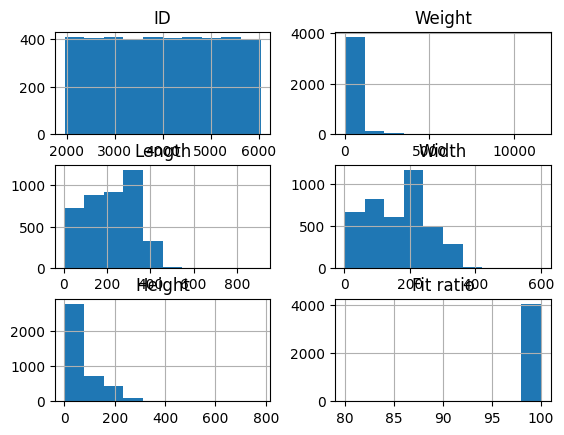

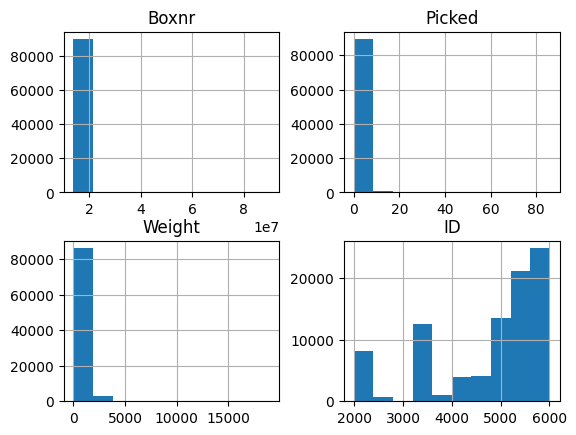

ID           0
Weight       2
Length       0
Width        0
Height       0
UOM Code     0
Fit ratio    0
dtype: int64
Date        0
Ordernr     0
Boxnr       0
Picked      0
Location    0
Box Name    0
Weight      0
ID          0
dtype: int64


In [21]:
articles = pd.read_csv('articles.csv')
order_lines = pd.read_csv('order_lines.csv')
boxes = pd.read_csv('boxes.csv')

# 1.1
print(articles.head())
print(order_lines.head())

# 1.2
print(articles.info())
print(order_lines.info())

# 1.3
print(articles.describe())
print(order_lines.describe())

# 1.4
articles.hist()
plt.show()
order_lines.hist()
plt.show()

# 1.5
print(articles.isnull().sum())
print(order_lines.isnull().sum())

## Data Visualization

In this section, we will visualize the data to understand the data better.

In [22]:
# Defining volume as Length * Width * Height
articles['Volume'] = articles['Length'] * articles['Width'] * articles['Height']

# Redefining Length/Width/Height
largest = articles[['Length', 'Width', 'Height']].max(axis=1)
smallest = articles[['Length', 'Width', 'Height']].min(axis=1)
middle = articles[['Length', 'Width', 'Height']].sum(axis=1) - largest - smallest

# Display percentage of values changed from Length/Width/Height to Largest/Middle/Smallest
print('Percentage of values changed from Length/Width/Height to Largest/Middle/Smallest:')
print((largest != articles['Length']).sum() / len(articles) * 100)
print((middle != articles['Width']).sum() / len(articles) * 100)
print((smallest != articles['Height']).sum() / len(articles) * 100)

# Describe largest/middle/smallest
print('Largest:')
print(largest.describe())
print('Middle:')
print(middle.describe())
print('Smallest:')
print(smallest.describe())

Percentage of values changed from Length/Width/Height to Largest/Middle/Smallest:
30.828182941903588
10.902348578491965
24.449938195302842
Largest:
count    4045.000000
mean      239.762423
std        95.112701
min        10.000000
25%       180.000000
50%       240.000000
75%       300.000000
max       910.000000
dtype: float64
Middle:
count    4045.000000
mean      163.992831
std        80.282369
min         4.000000
25%       100.000000
50%       165.000000
75%       211.000000
max       600.000000
dtype: float64
Smallest:
count    4045.000000
mean       39.618047
std        40.252796
min         1.000000
25%        10.000000
50%        20.000000
75%        55.000000
max       600.000000
dtype: float64


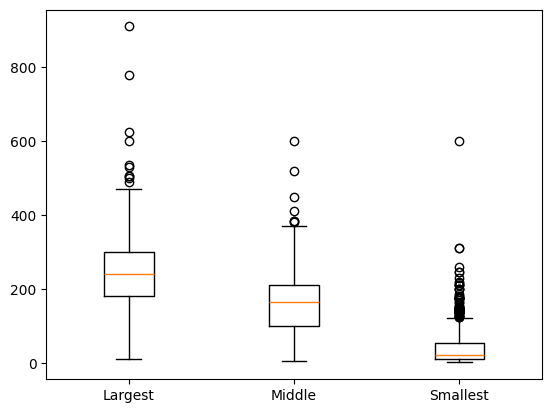

In [23]:
# Boxplot of the largest/middle/smallest
plt.boxplot([largest, middle, smallest])
plt.xticks([1, 2, 3], ['Largest', 'Middle', 'Smallest'])
plt.show()

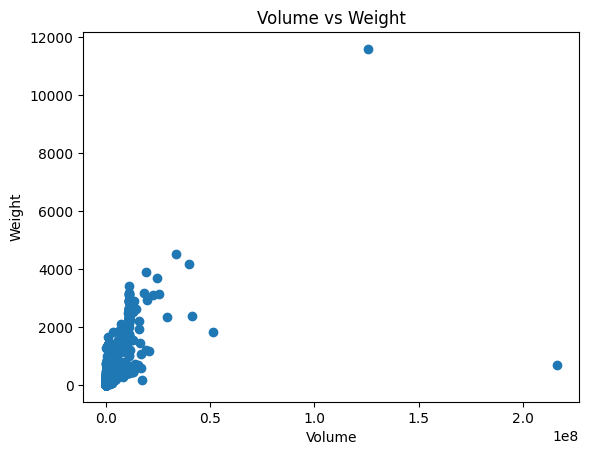

In [24]:
# Plotting the relation between volume and weight
plt.scatter(articles['Volume'], articles['Weight'])
plt.xlabel('Volume')
plt.ylabel('Weight')
plt.title('Volume vs Weight')
plt.show()

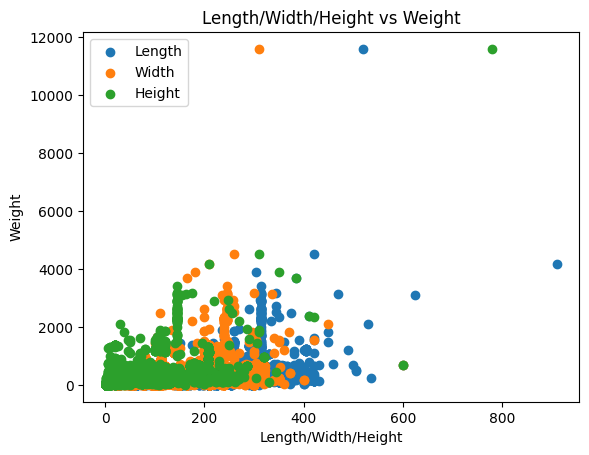

In [25]:
# Plotting Length/Width/Height (max value/mean value/min value) vs Weight
plt.scatter(articles['Length'], articles['Weight'])
plt.scatter(articles['Width'], articles['Weight'])
plt.scatter(articles['Height'], articles['Weight'])
plt.xlabel('Length/Width/Height')
plt.ylabel('Weight')
plt.title('Length/Width/Height vs Weight')
plt.legend(['Length', 'Width', 'Height'])
plt.show()

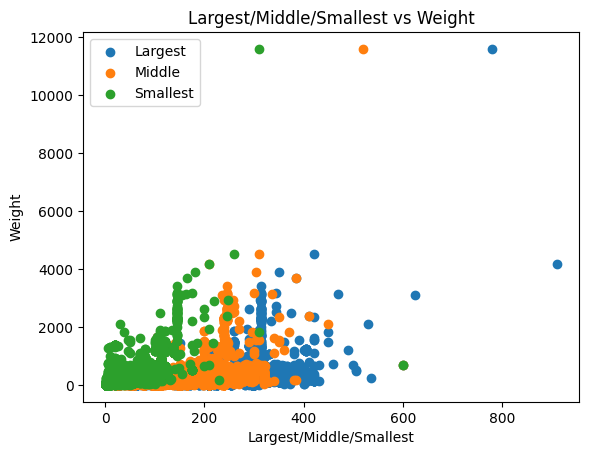

In [26]:
# Plotting the largest/middle/smallest dimensions vs Weight
plt.scatter(largest, articles['Weight'])
plt.scatter(middle, articles['Weight'])
plt.scatter(smallest, articles['Weight'])
plt.xlabel('Largest/Middle/Smallest')
plt.ylabel('Weight')
plt.title('Largest/Middle/Smallest vs Weight')
plt.legend(['Largest', 'Middle', 'Smallest'])
plt.show()

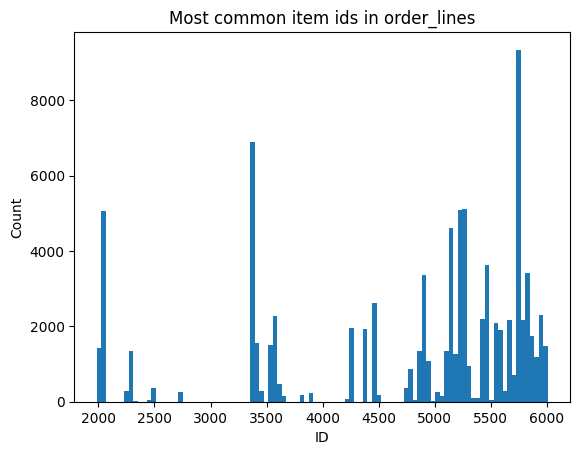

In [27]:
# Most common item ids in order_lines
plt.hist(order_lines['ID'], bins=100)
plt.xlabel('ID')
plt.ylabel('Count')
plt.title('Most common item ids in order_lines')
plt.show()

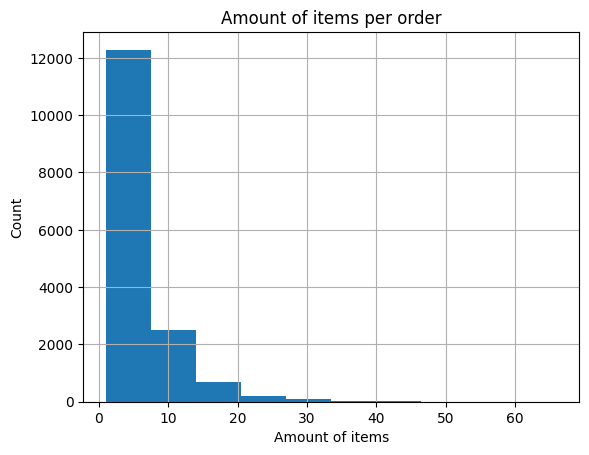

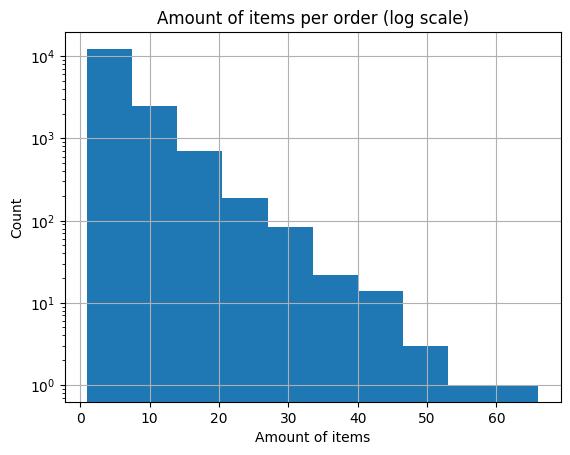

In [28]:
# Amount of items per order
order_lines['Ordernr'].value_counts().hist()
plt.xlabel('Amount of items')
plt.ylabel('Count')
plt.title('Amount of items per order')
plt.show()

# Amount of items per order (log scale)
order_lines['Ordernr'].value_counts().hist(log=True)
plt.xlabel('Amount of items')
plt.ylabel('Count')
plt.title('Amount of items per order (log scale)')
plt.show()

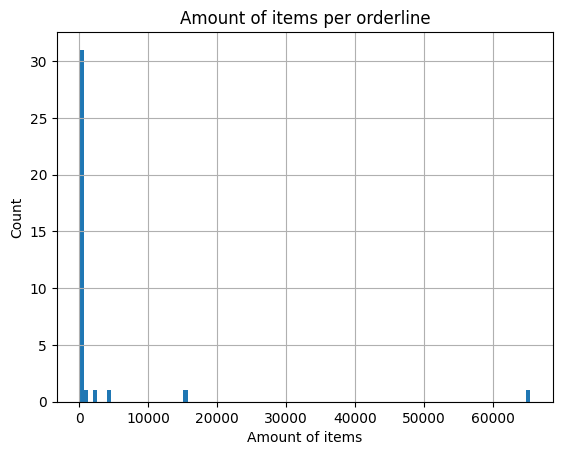

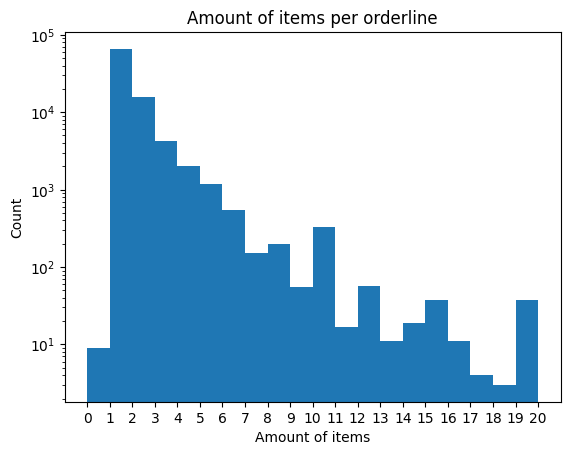

In [29]:
# Amount of items per orderline
order_lines['Picked'].value_counts().hist(bins=100)
plt.xlabel('Amount of items')
plt.ylabel('Count')
plt.title('Amount of items per orderline')
plt.show()

# Ignore outliers
order_lines['Picked'].hist(bins=20, range=(0, 20), log=True, grid=False)
plt.xticks(np.arange(0, 21, step=1))
plt.xlabel('Amount of items')
plt.ylabel('Count')
plt.title('Amount of items per orderline')
plt.show()

In [30]:
# Merge tables
order_lines['ID'] = order_lines['ID'].astype(int)
combined = order_lines.merge(articles, on='ID')
boxes['Box Volume'] = boxes['Length'] * boxes['Width'] * boxes['Height']
combined = combined.merge(boxes, left_on='Box Name', right_on='Container type')
combined['Line Volume'] = combined['Volume'] * combined['Picked']
combined['Percentage'] = combined['Line Volume'] / combined['Box Volume']
combined['Order Percentage'] = combined['Line Volume'] / combined.groupby('Boxnr')['Line Volume'].transform('sum')

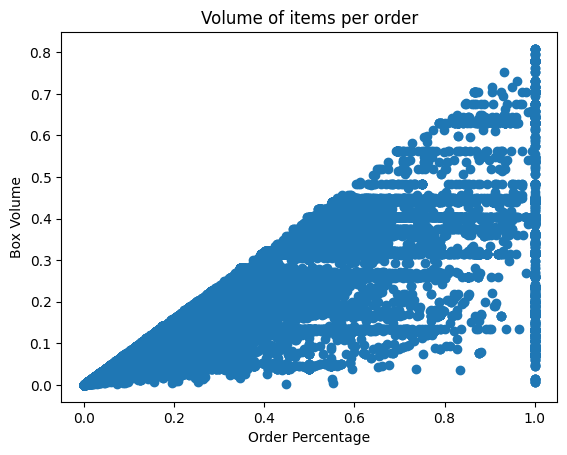

In [31]:
# Volume of items per order
plt.scatter(combined['Order Percentage'], combined['Percentage'])
plt.xlabel('Order Percentage')
plt.ylabel('Box Volume')
plt.title('Volume of items per order')
plt.show()

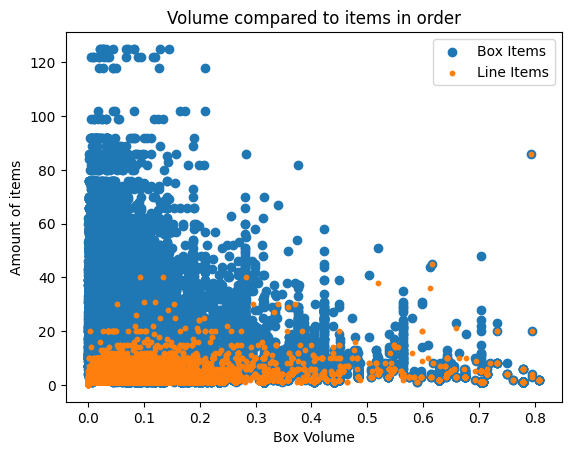

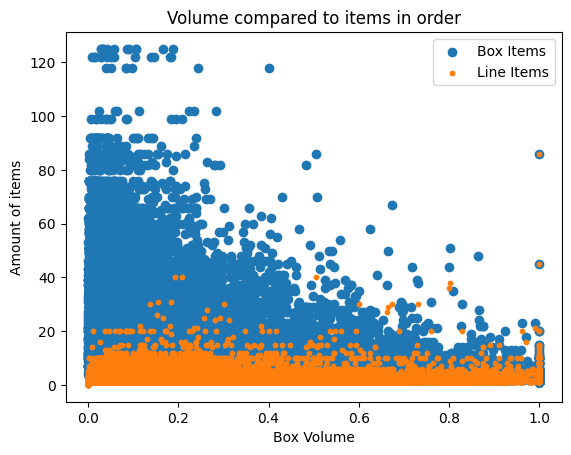

In [32]:
# Volume compared to items in order
plt.scatter(combined['Percentage'], combined.groupby('Boxnr')['Picked'].transform('sum'))
plt.scatter(combined['Percentage'], combined['Picked'], s=10)  # Adjust marker size for Line Items
plt.xlabel('Box Volume')
plt.ylabel('Amount of items')
plt.title('Volume compared to items in order')
plt.legend(['Box Items', 'Line Items'])
plt.show()

# Box Volume compared to items in order
plt.scatter(combined['Order Percentage'], combined.groupby('Boxnr')['Picked'].transform('sum'))
plt.scatter(combined['Order Percentage'], combined['Picked'], s=10)  # Adjust marker size for Line Items
plt.xlabel('Box Volume')
plt.ylabel('Amount of items')
plt.title('Volume compared to items in order')
plt.legend(['Box Items', 'Line Items'])
plt.show()

In [33]:
# Describe combined data
print(combined.describe())
print(combined.info())

              Boxnr        Picked      Weight_x            ID      Weight_y  \
count  8.990600e+04  89906.000000  89906.000000  89906.000000  89906.000000   
mean   1.391057e+07      1.518753    598.605421   4748.443207    397.528583   
std    4.725041e+04      1.387395    710.580716   1167.186880    276.143591   
min    1.378643e+07      0.000000      0.000000   1987.000000      1.000000   
25%    1.387003e+07      1.000000    145.000000   4272.000000    101.000000   
50%    1.391184e+07      1.000000    537.000000   5207.000000    440.000000   
75%    1.395213e+07      2.000000    660.000000   5684.000000    640.000000   
max    1.400528e+07     86.000000  18963.000000   6008.000000   2923.000000   

           Length_x       Width_x      Height_x     Fit ratio        Volume  \
count  89906.000000  89906.000000  89906.000000  89906.000000  8.990600e+04   
mean      92.096690     88.981136    151.570451     99.943652  1.442805e+06   
std       53.494821     42.297725     61.342156    

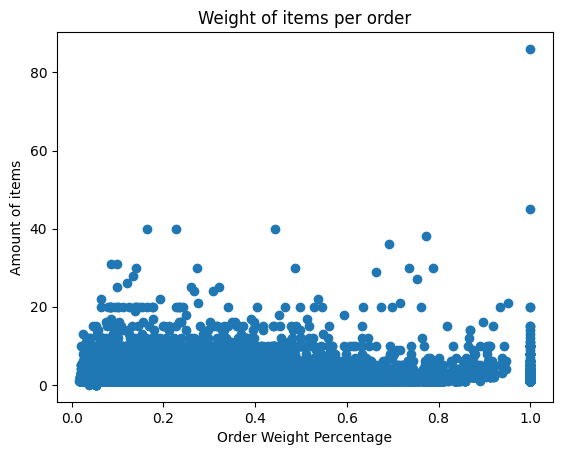

In [34]:
# rename combined['Weight_x'] to 'Weight per Line'
combined.rename(columns={'Weight_x': 'Weight per Line'}, inplace=True)
combined.rename(columns={'Weight_y': 'Item Weight'}, inplace=True)

# Weight per box per line
combined['Weight per Line'] = combined['Item Weight'] * combined['Picked'] + combined['Tare weight box']
combined['Weight per Box'] = combined.groupby('Boxnr')['Weight per Line'].transform('sum')
combined['Order Weight Percentage'] = combined['Weight per Line'] / combined.groupby('Boxnr')['Weight per Line'].transform('sum')

# Weight of items per order
plt.scatter(combined['Order Weight Percentage'], combined['Picked'])
plt.xlabel('Order Weight Percentage')
plt.ylabel('Amount of items')
plt.title('Weight of items per order')
plt.show()

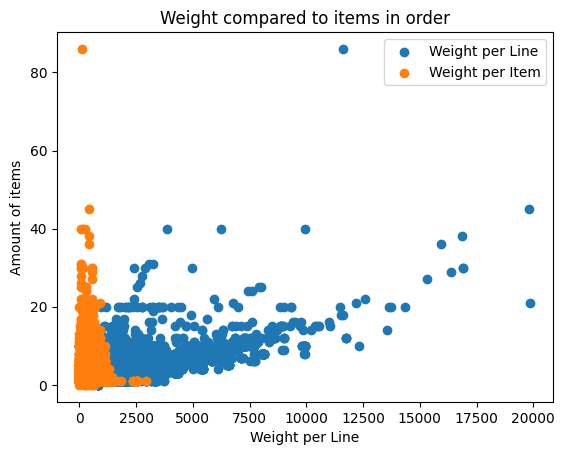

In [35]:
# Weight of line compared to weight per item compared to items in order
plt.scatter(combined['Weight per Line'], combined['Picked'])
plt.scatter(combined['Item Weight'], combined['Picked'])
plt.xlabel('Weight per Line')
plt.ylabel('Amount of items')
plt.title('Weight compared to items in order')
plt.legend(['Weight per Line', 'Weight per Item'])
plt.show()

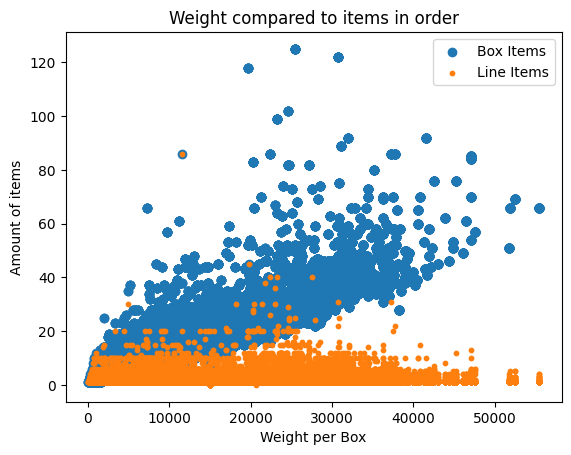

In [37]:
# Weight of box compared to weight per item compared to items in order
plt.scatter(combined['Weight per Box'], combined.groupby('Boxnr')['Picked'].transform('sum'))
plt.scatter(combined['Weight per Box'], combined['Picked'], s=10)  # Adjust marker size for Line Items
plt.xlabel('Weight per Box')
plt.ylabel('Amount of items')
plt.title('Weight compared to items in order')
plt.legend(['Box Items', 'Line Items'])
plt.show()

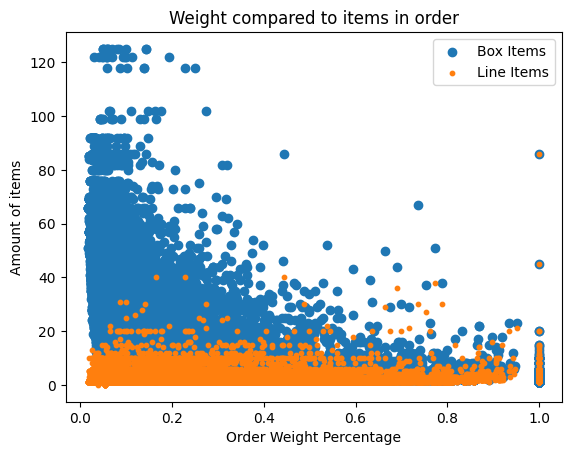

In [38]:
# Weight of box compared to weight per item compared to items in order
plt.scatter(combined['Order Weight Percentage'], combined.groupby('Boxnr')['Picked'].transform('sum'))
plt.scatter(combined['Order Weight Percentage'], combined['Picked'], s=10)  # Adjust marker size for Line Items
plt.xlabel('Order Weight Percentage')
plt.ylabel('Amount of items')
plt.title('Weight compared to items in order')
plt.legend(['Box Items', 'Line Items'])
plt.show()

In [36]:
# Information about the combined data
combined.to_csv('combined.csv', index=False)